In [1]:
%load_ext notexbook

%texify

# Correlation

So far we've been working with a single variable dataset, and so *univariate* function. 

In more realistic scenarios though, we're asked to work with multi-dimensional data[$^1$](#1) ($x \mapsto X$)

When presented with a new collection of data, one of the first questions you may ask is how they are related to each other. 

This can involve deep study of how one parameter is likely to vary as you change another but the simplest start is to look a the **linear correlation** between them.

<span class="fn" id=1><b>[1]</b>Sometimes also referred to as _high-dimensional_ data when the number of dimensions is very high, that is in the order of thousands of hundreds of thousands. This also relates to the [Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)</span>


**Correlation** is usually taught as being the degree to which two variables are *linearly* related, that is as one increases, on average how much does the other one increase. 

This is a useful measure because it's easy to calculate and most data only have either linear relationships or no relationship at all.

<img src="images/linear.svg" style="box-shadow: none;" width=400>

However, correlation is a much broader idea than that and when doing machine learning, it's worth understanding the bigger picture. 

At its core, correlation is a measure of how *related* two data sets are, that is "if I know the value of one of the two ariables, how much information do I have about the value of the other".

To highlight this, consider the following two variables, $x$ and $y$:

<img src="images/quadratic.svg" style="box-shadow: none;" width=400>

They have a linear correlation of zero (*on average* as $x$ increases, $y$ stays the same) but if you know the value of $X$, you clearly have *information* about what the value of $y$ is likely to be.

The other way to think about it is in terms of *mutual information*. $y$ is clearly sharing information with $x$, otherwise there would be no visible pattern.

## Multiple cross-correlation

It's very common when working on real data that you have more than two figures of interest.

To get a sense of some real data, let's look at a [housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) provided by scikit-learn.

In [2]:
from sklearn.datasets import fetch_california_housing

housing, target = fetch_california_housing(as_frame=True, return_X_y=True)

In [3]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


It has a row for each census block and a column for each feature, e.g. `median income of the block`, `average house age of the block` etc.

To get the linear correlation between all these features, we call the `corr()` method on the `DataFrame`:

In [4]:
housing.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


Here we see the features in our data set along both the rows and the columns. 

The correlation between each pair is given as a number between `-1.0` and `1.0` where `-1.0` is absolute inverse linear correlation, `1.0` is absolute positive linear correlation and `~0` is no linear correlation.

We see the the `1.0` occuring on the diagonal (because a variable is always completely correlated with itself) and a whole range of values between `-1.0` and `1.0` off-diagonal.

If we want the correlation between two specific columns then we can request it from this object:

In [5]:
corr = housing.corr()
corr["MedInc"]["AveRooms"]

0.32689543164129786

### Exercise #

- Look through the table manually and see if you can find the most negative and most positive correlations.
- Try to automate that search using Python code.
  - Hint: To find the minimum, use the `min()` and `idxmin()` methods. 
  To find the maximum, hide the diagonals first using `corr.replace(1.0, np.nan)`
- [<small>answer</small>](answers/answer_find_largest_correlations.ipynb)

## Plotting the correlation

Viewing the correlation coefficients as a table is useful if you want the precise value of the correlation but often you want a visual overview which can give you the information you want at a glance.

The easiest way to view it is as a **heat map** where each cell has a colour showing the value of the correlation. 

We will be using `seaborn` visualisation library that provides a higher-level interface to `matplotlib`.

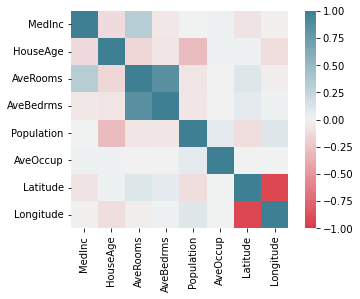

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

# We define a diverging colourmap so that 0.0 is white
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, cmap=cmap)
plt.show()

This gives us a sense of which parameters are strongly correlated with each other. 

Very blue squares are positively correlated, for example the average number of rooms (`AvgRooms`) and the average number of bedrooms (`AvgBedrms`). 

That correlation makes sense as they definitely have mutual information.

Others perhaps make less sense at a glance. 

We see that the latitude is very strongly negatively correlated with the longitude. 

Why on earth should there be any relationship between those two? 

Let's take a look at another view on the data to see if we can discover why.

## Multi-variable scatter matrix

Pandas also provides a quick method of looking at a large number of data parameters at once and looking visually at which might be worth investigating. 

If you pass any pandas `DataFrame` to the `scatter_matrix()` function then it will plot all the *pairs* of parameters in the data.

The produced graph has a lot of information in it so it's worth taking some time to make sure you understand these plots. 

The plot is arranged with all the variables of interest from top to bottom and then repeated from left to right so that any one square in the grid is defined by the intersection of two variables.

**Scatter plots**: Each box that is an intersection of a variable with another (e.g. row three, column one is the intersection between `AveRooms` and `MedInc`) shows the scatter plot of how the values of those variables relate to each other. If you see a strong diagonal line it means that those variables are correlated in this data set. It it's more of a blob or a flat horizontal or vertical line then that suggests a low correlation.

**Diagonals**: The square boxes along the diagonal from the top-left to the bottom-right are those intersections of a variable with itself and so are used, not to show correlation, but to show the distribution of values of each single variable as a histogram.

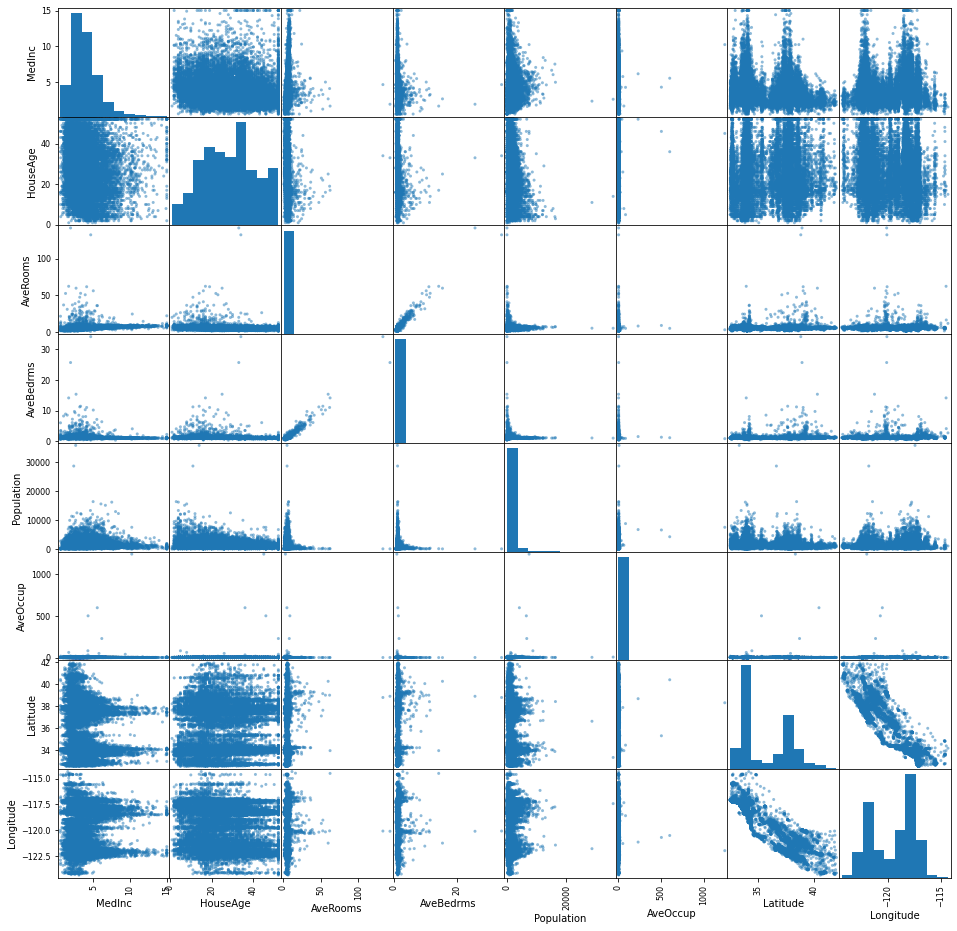

In [6]:
from pandas.plotting import scatter_matrix

a = scatter_matrix(housing, figsize=(16, 16))

In general, when calculating a regression, you want your features to be as uncorrelated with each other as possible. This is because if two features, $x_1$ and $x_2$ are strongly correlated with each other then it's possible to predict the value of $x_2$ from the value of $x_1$ with high confidence. This means that $x_2$ is not providing any additional predictive power.

In some cases this is not a problem as adding one extra variable does not slow down or harm the algorithm used but some methods benefit from choosing carefully the parameters which are being fitted over.

It's also possible in some cases to transform the data in some way to reduce the correlation between variables. One example of a method which does this is **Principal Component Analysis** (PCA).

On the other hand, you *do* want correlation between $X$ and $y$ as if there is no mutual information then there is no predictive power.

### Exercise #

Try running through the above step using a different dataset from scikit-learn. 

You can find them listed at https://scikit-learn.org/stable/datasets/toy_dataset.html. 

_Iris_ is a classic dataset used in machine learning which it is worth being aware of.

[<small>answer</small>](answers/answer_iris_correlation.ipynb)